# Semi-Monocoque Theory

In [1]:
from pint import UnitRegistry
import sympy
import networkx as nx
#import numpy as np
import matplotlib.pyplot as plt
#import sys
%matplotlib inline
#from IPython.display import display

/home/claudio/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/claudio/anaconda2/envs/py35/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Import **Section** class, which contains all calculations

In [2]:
from Section import Section

Initialization of **sympy** symbolic tool and **pint** for dimension analysis (not really implemented rn as not directly compatible with sympy)

In [3]:
ureg = UnitRegistry()
sympy.init_printing()

Define **sympy** parameters used for geometric description of sections

In [4]:
A, A0, t, t0, a, b, h, L = sympy.symbols('A A_0 t t_0 a b h L', positive=True)

We also define numerical values for each **symbol** in order to plot scaled section and perform calculations

In [5]:
values = [(A, 150 * ureg.millimeter**2),(A0, 250  * ureg.millimeter**2),(a, 80 * ureg.millimeter), \
          (b, 20 * ureg.millimeter),(h, 35 * ureg.millimeter),(L, 2000 * ureg.millimeter)]
datav = [(v[0],v[1].magnitude) for v in values]

# First example: Closed section

Define graph describing the section:

1) **stringers** are **nodes** with parameters:
- **x** coordinate
- **y** coordinate
- **Area**

2) **panels** are **oriented edges** with parameters:
- **thickness**
- **lenght** which is automatically calculated

In [6]:
stringers = {1:[(sympy.Integer(0),h),A],
             2:[(a/2,h),A],
             3:[(a,h),A],
             4:[(a-b,sympy.Integer(0)),A],
             5:[(b,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t,
          (4,5):t,
          (5,1):t}

Define section and perform first calculations

In [7]:
S1 = Section(stringers, panels)

## Verify that we find a simply closed section

In [8]:
S1.cycles

## Plot of **S1** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [9]:
start_pos={ii: [float(S1.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

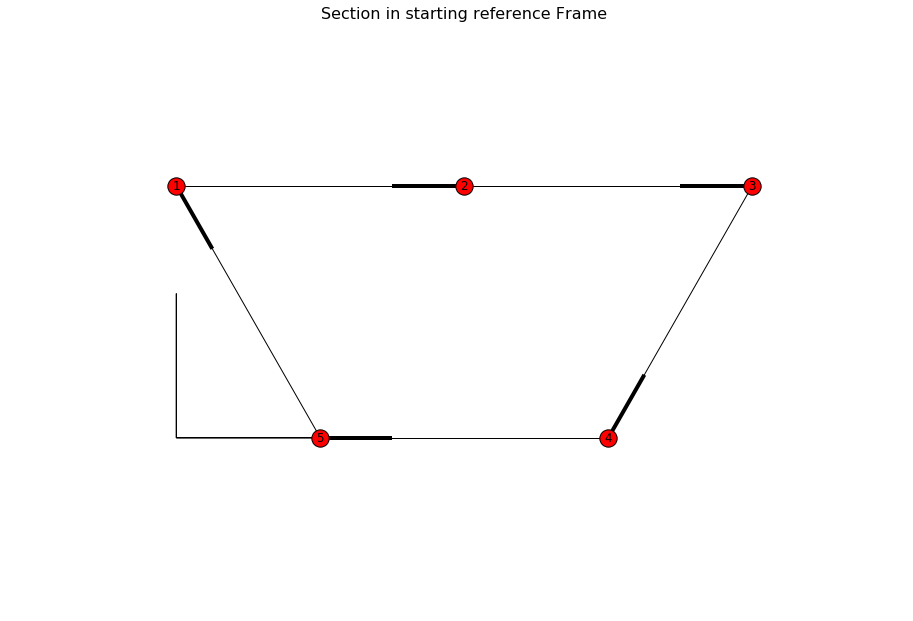

In [10]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

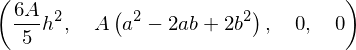

In [11]:
S1.Ixx0, S1.Iyy0, S1.Ixy0, S1.α0

## Plot of **S1** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [12]:
positions={ii: [float(S1.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S1.g.nodes() }

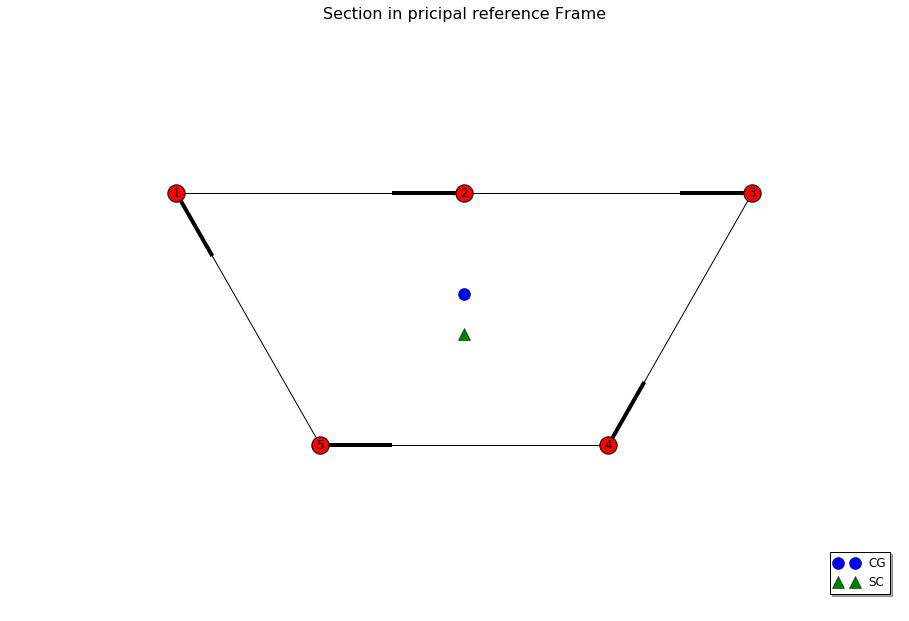

In [13]:
x_ct, y_ct = S1.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S1.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

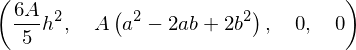

In [14]:
S1.Ixx, S1.Iyy, S1.Ixy, S1.θ

## **Shear center** expression 

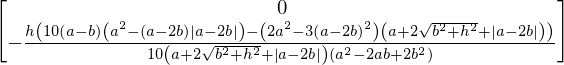

In [15]:
S1.ct

## Analisys of symmetry properties of the section

For **x** and **y** axes pair of symmetric **nodes** and **edges** are searched for

In [16]:
S1.symmetry

[{'edges': [((1, 2), (2, 3)), ((3, 4), (5, 1)), (4, 5)],
  'nodes': [(1, 3), (2, 2), (4, 5)]},
 {'edges': [], 'nodes': []}]

## Compute axial loads in Stringers in **S1**

We first define some symbols:

In [17]:
Tx, Ty, Nz, Mx, My, Mz, F, ry, ry, mz = sympy.symbols('T_x T_y N_z M_x M_y M_z F r_y r_x m_z')

Set **loads** on the section:

**Example 1**: _shear_ in **y** direction and _bending moment_ in **x** direction

In [18]:
S1.set_loads(_Tx=0, _Ty=Ty, _Nz=0, _Mx=Mx, _My=0, _Mz=0)

Compute _axial loads_ in **stringers** and _shear flows_ in **panels**

In [19]:
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

## Axial loads

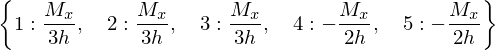

In [20]:
S1.N

## Shear flows

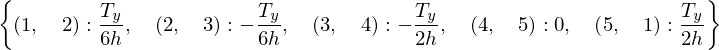

In [21]:
S1.q

**Example 2**: _twisting moment_ in **z** direction

In [22]:
S1.set_loads(_Tx=0, _Ty=0, _Nz=0, _Mx=0, _My=0, _Mz=Mz)
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

**Axial loads**

In [23]:
S1.N

**Panel fluxes**

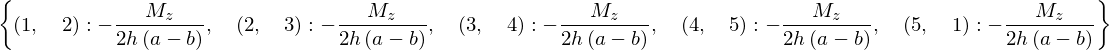

In [24]:
S1.q

Set **loads** on the section:

**Example 3**: _shear_ in **x** direction and _bending moment_ in **y** direction

In [25]:
S1.set_loads(_Tx=Tx, _Ty=0, _Nz=0, _Mx=0, _My=My, _Mz=0)
S1.compute_stringer_actions()
S1.compute_panel_fluxes();

**Axial loads**

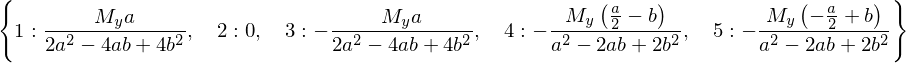

In [26]:
S1.N

**Panel fluxes**
Not really an easy expression

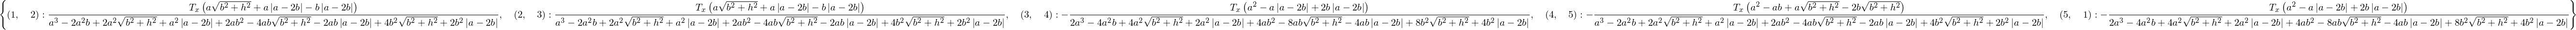

In [27]:
S1.q

## Compute **Jt**

Computation of **torsional moment of inertia**:

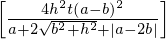

In [28]:
S1.compute_Jt()
S1.Jt

# Second example: Open section

In [29]:
stringers = {1:[(sympy.Integer(0),h),A],
             2:[(sympy.Integer(0),sympy.Integer(0)),A],
             3:[(a,sympy.Integer(0)),A],
             4:[(a,h),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t}

Define section and perform first calculations

In [30]:
S2 = Section(stringers, panels)

Verify that the section is open

In [31]:
S2.cycles

## Plot of **S2** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [32]:
start_pos={ii: [float(S2.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S2.g.nodes() }

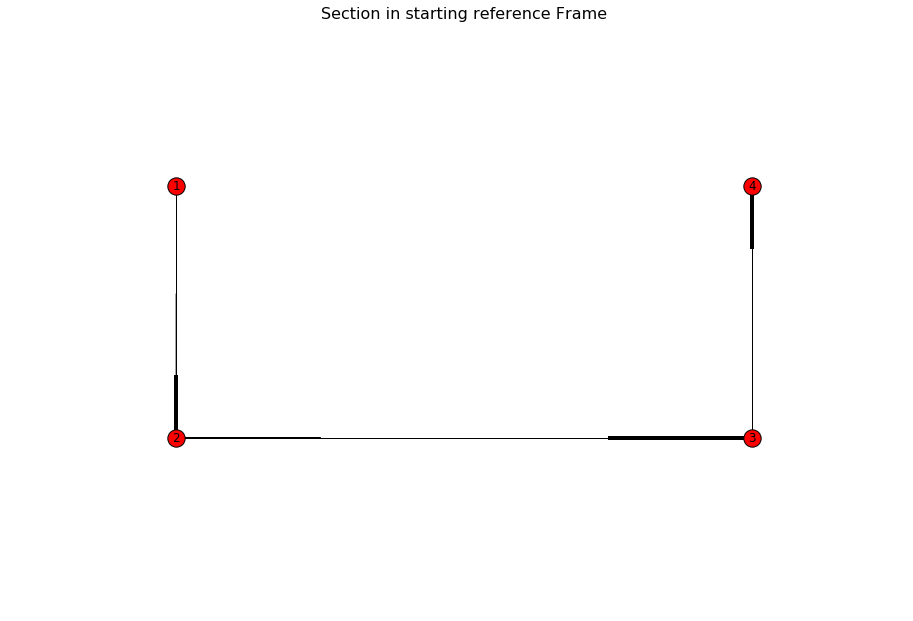

In [33]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [34]:
S2.Ixx0, S2.Iyy0, S2.Ixy0, S2.α0

## Plot of **S2** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [35]:
positions={ii: [float(S2.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S2.g.nodes() }

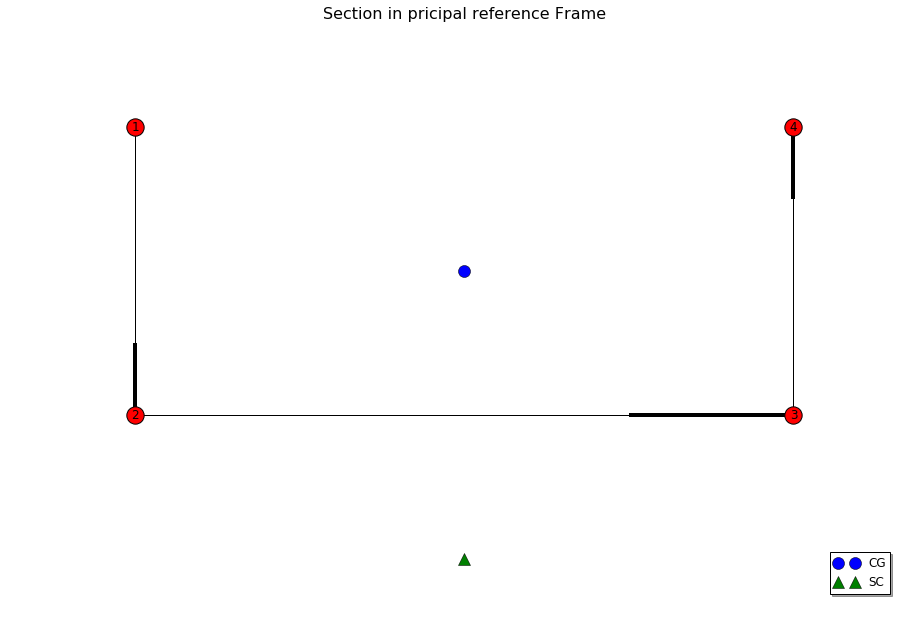

In [36]:
x_ct, y_ct = S2.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [37]:
S2.Ixx, S2.Iyy, S2.Ixy, S2.θ

## **Shear center** expression 

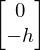

In [38]:
S2.ct

## Analisys of symmetry properties of the section

For **x** and **y** axes pair of symmetric **nodes** and **edges** are searched for

In [39]:
S2.symmetry

[{'edges': [((1, 2), (3, 4)), (2, 3)], 'nodes': [(1, 4), (2, 3)]},
 {'edges': [(1, 2), (3, 4)], 'nodes': [(1, 2), (3, 4)]}]

## Compute axial loads in Stringers in **S2**

Set **loads** on the section:

**Example 2**: _shear_ in **y** direction and _bending moment_ in **x** direction

In [40]:
S2.set_loads(_Tx=0, _Ty=Ty, _Nz=0, _Mx=Mx, _My=0, _Mz=0)

Compute _axial loads_ in **stringers** and _shear flows_ in **panels**

In [41]:
S2.compute_stringer_actions()
S2.compute_panel_fluxes();

## Axial loads

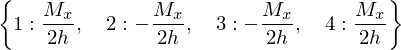

In [42]:
S2.N

## Shear flows

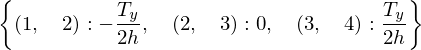

In [43]:
S2.q

Set **loads** on the section:

**Example 2**: _shear_ in **x** direction and _bending moment_ in **y** direction

In [44]:
S2.set_loads(_Tx=Tx, _Ty=0, _Nz=0, _Mx=0, _My=My, _Mz=0)
S2.compute_stringer_actions()
S2.compute_panel_fluxes();

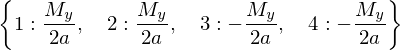

In [45]:
S2.N

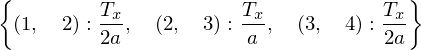

In [46]:
S2.q

# Second example (2): Open section

In [47]:
stringers = {1:[(a,h),A],
             2:[(sympy.Integer(0),h),A],
             3:[(sympy.Integer(0),sympy.Integer(0)),A],
             4:[(a,sympy.Integer(0)),A]}

panels = {(1,2):t,
          (2,3):t,
          (3,4):t}

Define section and perform first calculations

In [48]:
S2_2 = Section(stringers, panels)

## Plot of **S2** section in original reference frame

Define a dictionary of coordinates used by **Networkx** to plot section as a Directed graph.
Note that arrows are actually just thicker stubs

In [49]:
start_pos={ii: [float(S2_2.g.node[ii]['ip'][i].subs(datav)) for i in range(2)] for ii in S2_2.g.nodes() }

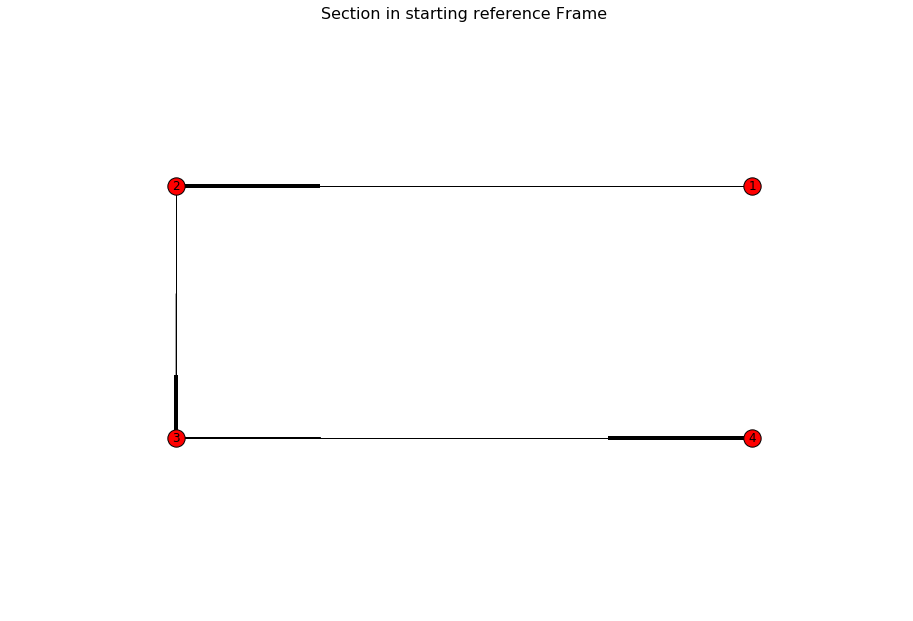

In [50]:
plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2_2.g,with_labels=True, arrows= True, pos=start_pos)
plt.arrow(0,0,20,0)
plt.arrow(0,0,0,20)
#plt.text(0,0, 'CG', fontsize=24)
plt.axis('equal')
plt.title("Section in starting reference Frame",fontsize=16);

Expression of **Inertial properties** wrt Center of Gravity in with original rotation

In [51]:
S2_2.Ixx0, S2_2.Iyy0, S2_2.Ixy0, S2_2.α0

## Plot of **S2** section in inertial reference Frame

Section is plotted wrt **center of gravity** and rotated (if necessary) so that *x* and *y* are principal axes.
**Center of Gravity** and **Shear Center** are drawn

In [52]:
positions={ii: [float(S2_2.g.node[ii]['pos'][i].subs(datav)) for i in range(2)] for ii in S2_2.g.nodes() }

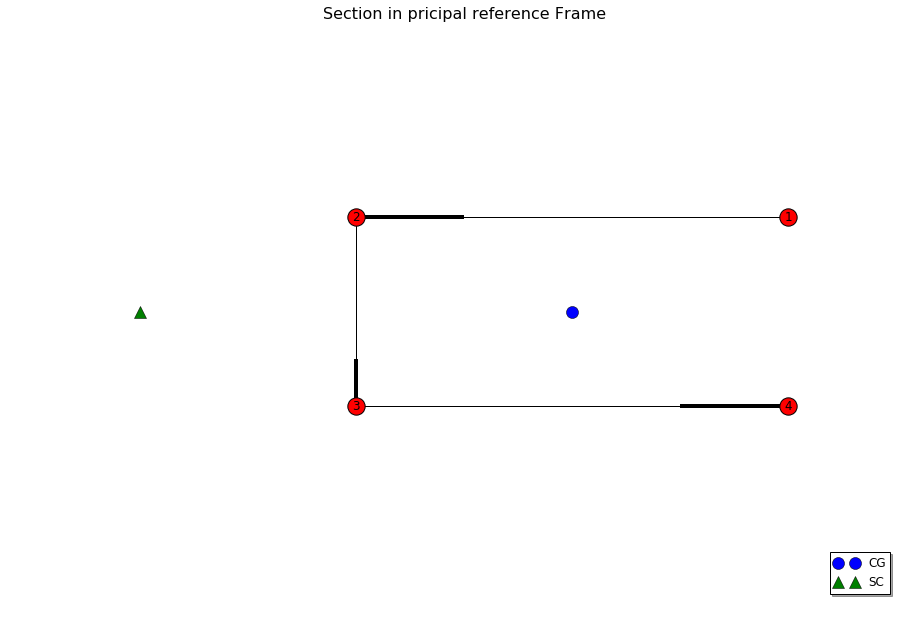

In [53]:
x_ct, y_ct = S2_2.ct.subs(datav)

plt.figure(figsize=(12,8),dpi=300)
nx.draw(S2_2.g,with_labels=True, pos=positions)
plt.plot([0],[0],'o',ms=12,label='CG')
plt.plot([x_ct],[y_ct],'^',ms=12, label='SC')
#plt.text(0,0, 'CG', fontsize=24)
#plt.text(x_ct,y_ct, 'SC', fontsize=24)
plt.legend(loc='lower right', shadow=True)
plt.axis('equal')
plt.title("Section in pricipal reference Frame",fontsize=16);

Expression of **inertial properties** in *principal reference frame*

In [54]:
S2_2.Ixx, S2_2.Iyy, S2_2.Ixy, S2_2.θ

## **Shear center** expression 

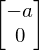

In [55]:
S2_2.ct